## OOD sets reaction superclasses

In [2]:
import os
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from rdkit import Chem

### Plot rxn superclasses in high split

In [7]:
test = pd.read_csv(
    "../data/processed/high_mw_split/mapped_high_test.tsv", sep="\t"
).fillna(0)
train = pd.read_csv(
    "../data/processed/high_mw_split/mapped_high_train.tsv", sep="\t"
).fillna(0)

In [8]:
def count_level_i(v, i=1):
    lvl_freq = (
        v.astype(str)
        .apply(lambda x: ".".join(x.split(".")[:i]))
        .rename("one")
        .value_counts()
    )
    return lvl_freq

In [9]:
train_ = count_level_i(train["rxn_class"], 1)
train_ /= train_.sum()
test_ = count_level_i(test["rxn_class"], 1)
test_ /= test_.sum()

train_counts = train_.sort_index()
train_counts = train_counts.reset_index()
train_counts["dataset"] = ["train"] * len(train_counts)
train_counts.replace(np.nan, 0)
test_counts = test_.sort_index()
test_counts = test_counts.reset_index()
test_counts["dataset"] = ["test"] * len(test_counts)

merged = pd.concat((train_counts, test_counts), axis=0)

rxn_class_map = {
    "0": "Unassigned",
    "1": "Heteroatom alkylation/arylation",
    "2": "Acylation",
    "3": "C-C bond formation",
    "4": "Heterocycle formation",
    "5": "Protection",
    "6": "Deprotection",
    "7": "Reduction",
    "8": "Oxidation",
    "9": "FGI",
    "10": "FGA",
    "11": "Resolution",
    "12": "Miscelaneous",
}

merged["Rxn Superclass"] = merged["index"].map(rxn_class_map)

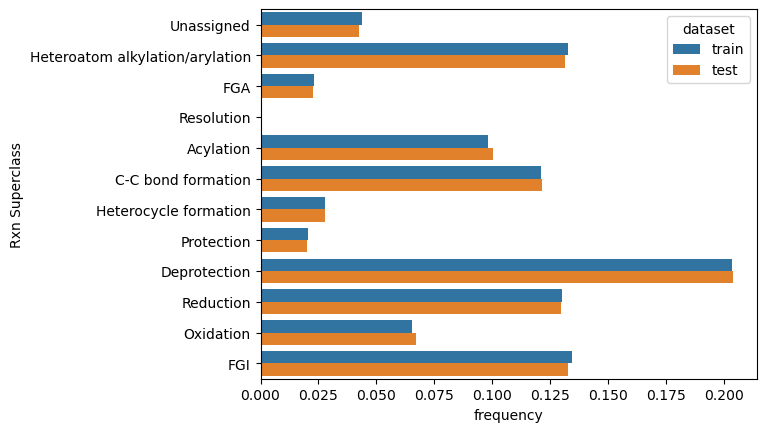

In [11]:
sns.barplot(
    data=merged, y="Rxn Superclass", x="one", hue="dataset", orient="h"
)
plt.xlabel("frequency")
plt.ylabel("Rxn Superclass")
plt.savefig("ood_high_superclasses.svg", bbox_inches="tight");

### Low MW split

Same for low

In [14]:
test = pd.read_csv(
    "../data/processed/low_mw_split/mapped_low_test.tsv", sep="\t"
).fillna(0)
train = pd.read_csv(
    "../data/processed/low_mw_split/mapped_low_train.tsv", sep="\t"
).fillna(0)

In [15]:
train_ = count_level_i(train["rxn_class"], 1)
train_ /= train_.sum()
test_ = count_level_i(test["rxn_class"], 1)
test_ /= test_.sum()

train_counts = train_.sort_index()
train_counts = train_counts.reset_index()
train_counts["dataset"] = ["train"] * len(train_counts)
train_counts.replace(np.nan, 0)
test_counts = test_.sort_index()
test_counts = test_counts.reset_index()
test_counts["dataset"] = ["test"] * len(test_counts)

merged = pd.concat((train_counts, test_counts), axis=0)

rxn_class_map = {
    "0": "Unassigned",
    "1": "Heteroatom alkylation/arylation",
    "2": "Acylation",
    "3": "C-C bond formation",
    "4": "Heterocycle formation",
    "5": "Protection",
    "6": "Deprotection",
    "7": "Reduction",
    "8": "Oxidation",
    "9": "FGI",
    "10": "FGA",
    "11": "Resolution",
    "12": "Miscelaneous",
}

merged["Rxn Superclass"] = merged["index"].map(rxn_class_map)

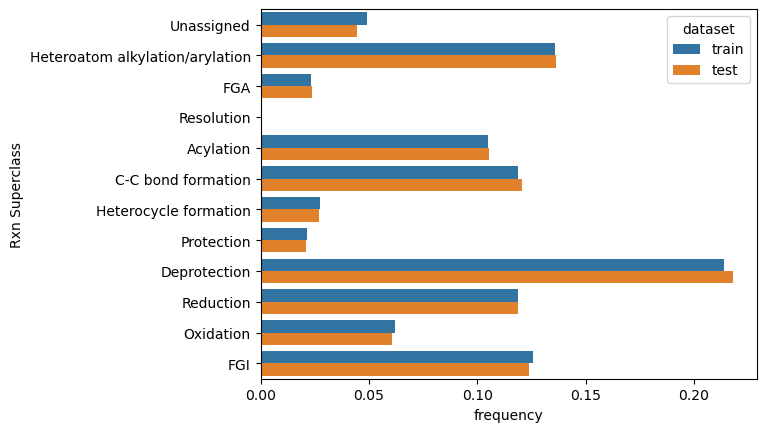

In [16]:
sns.barplot(
    data=merged, y="Rxn Superclass", x="one", hue="dataset", orient="h"
)
plt.xlabel("frequency")
plt.ylabel("Rxn Superclass")
plt.savefig("ood_low_superclasses.svg", bbox_inches="tight");